SERHAT'S PART

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
dataset = pd.read_csv('movies.csv')
dataset = dataset[['year','genre', 'duration', 'votes','budget', 'usa_gross_income', 
                   'worlwide_gross_income', 'metascore', 'avg_vote']]
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)
dataset['genre'] = dataset['genre'].apply(lambda x: x.split(',')[0])
dataset['usa_gross_income'] = dataset['usa_gross_income'].replace(r'\D', '', regex=True).astype(float)
dataset['budget'] = dataset['budget'].replace(r'\D', '', regex=True).astype(float)
dataset['worlwide_gross_income'] = dataset['worlwide_gross_income'].replace(r'\D', '', regex=True).astype(float)

C:\Users\serha\AppData\Local\Temp\ipykernel_4044\3498858366.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('movies.csv')


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
y_pred = np.clip(y_pred, 0, 10)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE =",rmse)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

RMSE = 0.5883570897657872
[[5.05 3.3 ]
 [6.02 5.8 ]
 [6.66 6.7 ]
 ...
 [6.98 6.9 ]
 [6.   5.3 ]
 [6.95 7.  ]]


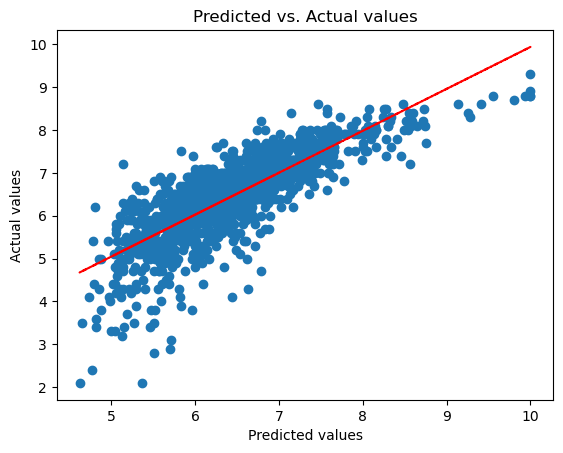

In [9]:
# y_pred and y_test are the predicted and actual values, respectively
plt.scatter(y_pred, y_test)

# Calculate and plot the line of best fit
z = np.polyfit(y_pred, y_test, 1)
p = np.poly1d(z)
plt.plot(y_pred,p(y_pred),"r--")

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Predicted vs. Actual values')

plt.show()

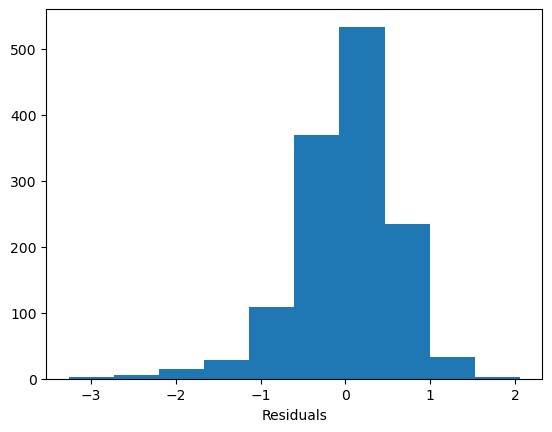

In [10]:
# calculate the residuals
residuals = y_test - y_pred

# create the histogram
plt.hist(residuals)

# add a label to the x-axis
plt.xlabel('Residuals')

# show the plot
plt.show()

c:\Users\serha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


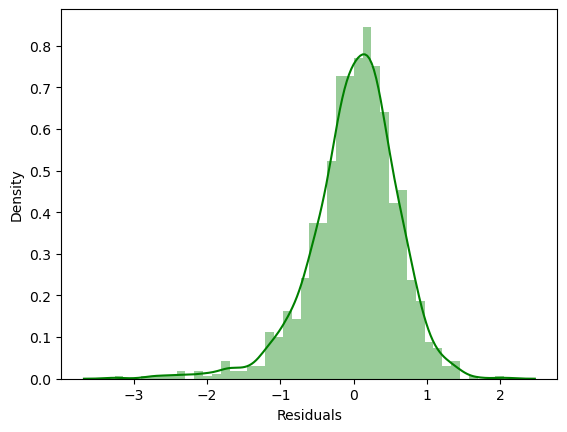

In [11]:
import seaborn as sns
# calculate the residuals
residuals = y_test - y_pred

# create the histogram using seaborn's distplot function
sns.distplot(residuals, color='green')

# add a label to the x-axis
plt.xlabel('Residuals')

# show the plot
plt.show()

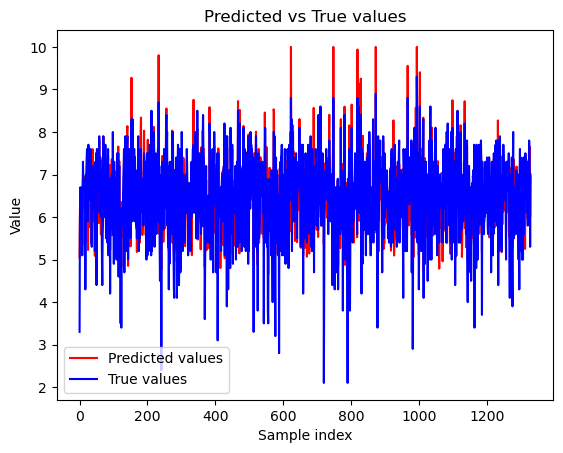

In [12]:
plt.plot(y_pred, 'r', label='Predicted values')
plt.plot(y_test, 'b', label='True values')
plt.legend()
plt.xlabel("Sample index")
plt.ylabel("Value")
plt.title("Predicted vs True values")
plt.show()

In [13]:
genre_encoder = ct.named_transformers_['encoder']
genre_features = genre_encoder.transform([['Action']]).toarray() #genre
features = np.concatenate((genre_features, np.array([[2020, 120, 1000, 100000000, 200000000, 400000000, 70]])), axis=1)
#year - duration - votes - budget - USA gross income - Worldwide gross income - Metascore
prediction = regressor.predict(features)[0]
print(prediction)

6.456278627837117


In [14]:
#HARRY POTTER 4
genre_encoder = ct.named_transformers_['encoder']
genre_features = genre_encoder.transform([['Adventure']]).toarray()
features = np.concatenate((genre_features, np.array([[2005, 157, 642310, 150000000, 292507000, 896520000, 77]])), axis=1)
prediction = regressor.predict(features)[0]
print("Predicted Value:",prediction)
print("Real value: 7.7")

Predicted Value: 8.06288649518489
Real value: 7.7


In [15]:
#Pokémon: Detective Pikachu
genre_encoder = ct.named_transformers_['encoder']
genre_features = genre_encoder.transform([['Adventure']]).toarray()  # assuming 'Adventure' is the genre of Pokémon Detective Pikachu
features = np.concatenate((genre_features, np.array([[2019, 104, 554767, 175000000, 435110227, 1055110227, 63]])), axis=1)  # these are the values for the other features of the movie
prediction = regressor.predict(features)[0]
print("Predicted Value:",prediction)
print("Real value: 6.5")

Predicted Value: 6.787354590040273
Real value: 6.5


In [16]:
genre_encoder = ct.named_transformers_['encoder']
genre_features = genre_encoder.transform([['Drama']]).toarray()  # assuming 'Drama' is the genre of Fight Club
features = np.concatenate((genre_features, np.array([[1999, 139, 1235665, 63000000, 100455819, 100455819, 66]])), axis=1)  # these are the values for the other features of the movie
prediction = regressor.predict(features)[0]
print("Predicted Value:",prediction)
print("Real value: 8.8")

Predicted Value: 8.905467264464669
Real value: 8.8


In [17]:
genre_encoder = ct.named_transformers_['encoder']
genre_features = genre_encoder.transform([['Action']]).toarray()  # assuming 'Action' is the genre of The Dark Knight
features = np.concatenate((genre_features, np.array([[2008, 152, 1736344, 185000000, 534858444, 1004515874, 84]])), axis=1)  # these are the values for the other features of the movie
prediction = regressor.predict(features)[0]
print(prediction)


9.673956032608576


In [18]:
genre_encoder = ct.named_transformers_['encoder']
genre_features = genre_encoder.transform([['Comedy']]).toarray()  # assuming 'Comedy' is the genre of Mask 2
features = np.concatenate((genre_features, np.array([[2005, 95, 57000, 84000000, 17018422, 59918422, 20]])), axis=1)  # these are the values for the other features of the movie
prediction = regressor.predict(features)[0]
print("Predicted Value:",prediction)
print("Real value: 2.2")

Predicted Value: 5.150526122946472
Real value: 2.2


In [ ]:
genre_encoder = ct.named_transformers_['encoder']
genre_features = genre_encoder.transform([['genre']]).toarray()  # assuming 'Drama' is the genre of Fight Club
features = np.concatenate((genre_features, np.array([[year, duration, votes, budget, domestic, worldwide, metescore]])), axis=1)  # these are the values for the other features of the movie
prediction = regressor.predict(features)[0]
print("Predicted Value:",prediction)